<a href="https://colab.research.google.com/github/MedvedevaAlina27/arh_project/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%BE%D0%B9_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9%2C_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_BatchNormalization()_%D0%B8_Dropout()%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №4. Построение сверточной нейронной сети для классификации изображений, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

## Задание 1. Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout():

### 1.1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки:

*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras import backend as K

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

### 1.2. Визуализируйте несколько изображений из датасета:


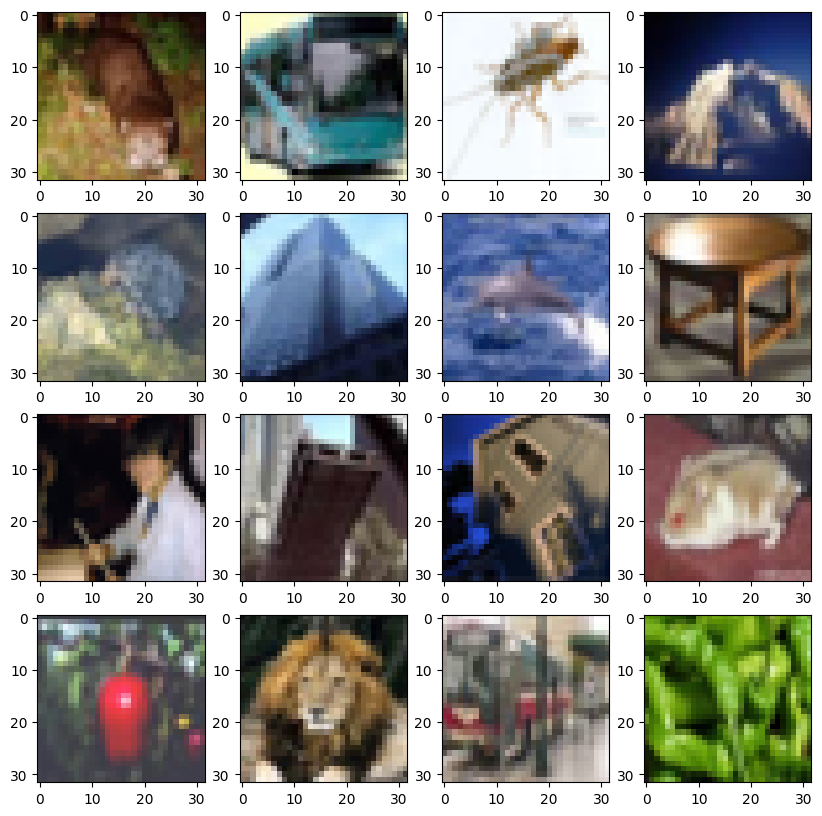

In [ ]:
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])

### 1.3. Произведите нормализацию данных:

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

### 1.4. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout():

Имя данной модели: model_1

In [ ]:
# Create a sequential model
model_1 = Sequential()

# Add convolutional layers
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model_1.add(Flatten())

# Add fully connected layers
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(100, activation='softmax'))
model_1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [ ]:
batch_size = 128
epochs = 5

Обучите созданную модель

In [ ]:
model_1_history = model_1.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 11s 14ms/step - loss: 3.7589 - accuracy: 0.1298 - val_loss: 3.2423 - val_accuracy: 0.2131
Epoch 2/5
391/391 [==============================] - 4s 11ms/step - loss: 2.9638 - accuracy: 0.2718 - val_loss: 2.8472 - val_accuracy: 0.2958
Epoch 3/5
391/391 [==============================] - 4s 11ms/step - loss: 2.5647 - accuracy: 0.3534 - val_loss: 2.6351 - val_accuracy: 0.3422
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 2.2567 - accuracy: 0.4157 - val_loss: 2.4932 - val_accuracy: 0.3796
Epoch 5/5
391/391 [==============================] - 5s 11ms/step - loss: 1.9756 - accuracy: 0.4780 - val_loss: 2.4582 - val_accuracy: 0.3941


### 1.5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization():

Имя данной модели: model_2

In [ ]:
# Create a sequential model
model_2 = Sequential()

# Add convolutional layers
model_2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model_2.add(Flatten())

# Add fully connected layers
model_2.add(BatchNormalization())
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(100, activation='softmax'))
model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

Обучите созданную модель

In [ ]:
model_2_history = model_2.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 17s 18ms/step - loss: 3.3714 - accuracy: 0.2097 - val_loss: 3.6930 - val_accuracy: 0.1576
Epoch 2/5
391/391 [==============================] - 7s 18ms/step - loss: 2.4093 - accuracy: 0.3887 - val_loss: 3.1647 - val_accuracy: 0.2859
Epoch 3/5
391/391 [==============================] - 4s 11ms/step - loss: 1.9224 - accuracy: 0.4942 - val_loss: 2.5230 - val_accuracy: 0.3850
Epoch 4/5
391/391 [==============================] - 4s 11ms/step - loss: 1.5458 - accuracy: 0.5853 - val_loss: 2.4830 - val_accuracy: 0.3989
Epoch 5/5
391/391 [==============================] - 4s 11ms/step - loss: 1.1850 - accuracy: 0.6776 - val_loss: 2.5992 - val_accuracy: 0.4015


### 1.6. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout():

Имя данной модели: model_3

In [ ]:
# Create a sequential model
model_3 = Sequential()

# Add convolutional layers
model_3.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_3.add(Conv2D(32, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

# Flatten the feature maps
model_3.add(Flatten())

# Add fully connected layers
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='softmax'))
model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

Обучите созданную модель

In [ ]:
model_3_history = model_3.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 8s 15ms/step - loss: 4.1038 - accuracy: 0.0693 - val_loss: 3.5354 - val_accuracy: 0.1703
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 3.4210 - accuracy: 0.1826 - val_loss: 3.0492 - val_accuracy: 0.2621
Epoch 3/5
391/391 [==============================] - 6s 17ms/step - loss: 3.0681 - accuracy: 0.2452 - val_loss: 2.7602 - val_accuracy: 0.3150
Epoch 4/5
391/391 [==============================] - 5s 12ms/step - loss: 2.8446 - accuracy: 0.2910 - val_loss: 2.6676 - val_accuracy: 0.3334
Epoch 5/5
391/391 [==============================] - 5s 13ms/step - loss: 2.6744 - accuracy: 0.3239 - val_loss: 2.5075 - val_accuracy: 0.3660


### 1.7. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [ ]:
# Create a sequential model
model_4 = Sequential()

# Add convolutional layers
model_4.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_4.add(Conv2D(32, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

# Flatten the feature maps
model_4.add(Flatten())

# Add fully connected layers
model_4.add(BatchNormalization())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(BatchNormalization())
model_4.add(Dense(100, activation='softmax'))
model_4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

Обучите созданную модель

In [ ]:
model_4_history = model_4.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 9s 16ms/step - loss: 4.0650 - accuracy: 0.1031 - val_loss: 3.6648 - val_accuracy: 0.1676
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 3.2610 - accuracy: 0.2130 - val_loss: 2.8249 - val_accuracy: 0.3009
Epoch 3/5
391/391 [==============================] - 5s 14ms/step - loss: 2.8691 - accuracy: 0.2844 - val_loss: 2.7489 - val_accuracy: 0.3171
Epoch 4/5
391/391 [==============================] - 5s 14ms/step - loss: 2.6136 - accuracy: 0.3347 - val_loss: 2.5287 - val_accuracy: 0.3575
Epoch 5/5
391/391 [==============================] - 5s 13ms/step - loss: 2.4469 - accuracy: 0.3701 - val_loss: 2.4181 - val_accuracy: 0.3827


### Задание 1.8. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель:

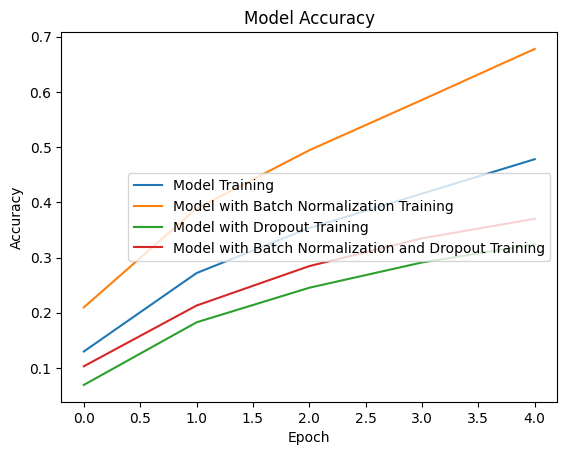

In [ ]:
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_3_history.history['accuracy'])
plt.plot(model_4_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model Training','Model with Batch Normalization Training',
            'Model with Dropout Training', 'Model with Batch Normalization and Dropout Training'],
           loc='center right')

Ваши выводы

Ваш итог

### 1.9. Визуализируйте карты активации модели с BatchNorm() и Dropout(),отдельно по 5 классам (на Ваш выбор):

In [ ]:
from keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
def visualize_act_map(model, img):
  """
  Функция для визуализации активаций слоев модели Keras в последовательном порядке

  Args:
      model: Обученная модель Keras
      img: Изображение, преобразованное в тензор

  Returns:
      None. Визуализирует активации интересующих слоев в последовательном порядке.
  """
  # Создаем модель для активаций
  layer_outputs = [layer.output for layer in model.layers if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D))]
  activation_model = Model(inputs=model.input, outputs=layer_outputs)

  # Получаем активации
  activations = activation_model.predict(img)

  # Визуализация активаций
  for layer_activation, layer in zip(activations, model.layers):
    if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D)):
      n_features = layer_activation.shape[-1]
      size = layer_activation.shape[1]
      n_cols = n_features // 16 + int(n_features % 16 > 0)
      display_grid = np.zeros((size * n_cols, size * 16))

      for col in range(n_cols):
        for row in range(16):
            if col * 16 + row < n_features:  # Проверяем, что индекс не выходит за границы
              channel_image = layer_activation[0, :, :, col * 16 + row]
              channel_image -= channel_image.mean()

              # Добавлено исправление для RuntimeWarning: invalid value encountered in divide
              if channel_image.std() == 0:
                channel_image += 1*(10**8)

              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128

              # Добавлено исправление для RuntimeWarning: invalid value encountered in cast
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')

              display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

      scale = 1. / size
      fig, ax = plt.subplots(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
      ax.set_title(layer.name)
      ax.grid(False)
      # Используем imshow для отображения изображений
      ax.imshow(display_grid, aspect='auto', cmap='viridis')

      # Создаем границы между плитками
      for i in range(1, n_cols):
        ax.axhline(y=i * size - 0.5, color='white', linewidth=2)
      for i in range(1, 16):
        ax.axvline(x=i * size - 0.5, color='white', linewidth=2)

      plt.show()

In [ ]:
model = load_model("")

In [ ]:
visualize_act_map(model_2, x_test)

313/313 [==============================] - 1s 3ms/step


## Задание 2. Загрузите Ваш датасет из предыдущей работы. Разделите его на обучающую и тестовую выборки. Обучите модель классификации с применением BatchNorm() и Dropout(). Сравните точность с моделями, обученными Вами ранее. Визуализируйте карты активаций.

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense, Conv2D, Flatten

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
from imutils import paths
import tensorflow as tf

In [ ]:
# Загружаем датасет из гугл-диска
datadir = 'Dataset'
if os.path.isdir(datadir)>0:
    print ('Data directory already exists and it is not empty, miss downloading')
else:
    print ('Data directory does not exists or it is empty, download the dataset')
    !gdown --id 1BwWY3_mUwnC3kfW-m6LKd6xgiUIQQ0mh
 #Скопировать ID из ссылки на файл в гугл диске, предварительно нужно открыть доступ по ссылке.
    !unzip fruits.zip

Data directory does not exists or it is empty, download the dataset
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BwWY3_mUwnC3kfW-m6LKd6xgiUIQQ0mh
To: /content/fruits.zip
100% 6.66M/6.66M [00:00<00:00, 84.0MB/s]
Archive:  fruits.zip
replace fruits/fresh_peaches_done/fresh_peach_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
imagePaths = sorted(list(paths.list_images('/content/fruits')))
random.shuffle(imagePaths)
def load_images(imagePaths, compression_size = 32):

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels


In [ ]:
compression_size = 32

data, labels = load_images(imagePaths, compression_size)

In [ ]:
labels

['fresh_peaches_done',
 'fresh_strawberries_done',
 'fresh_strawberries_done',
 'fresh_strawberries_done',
 'fresh_peaches_done',
 'fresh_peaches_done',
 'fresh_strawberries_done',
 'fresh_strawberries_done',
 'fresh_strawberries_done',
 'fresh_pomegranates_done',
 'fresh_strawberries_done',
 'fresh_pomegranates_done',
 'fresh_pomegranates_done',
 'fresh_strawberries_done',
 'fresh_peaches_done',
 'fresh_pomegranates_done',
 'fresh_peaches_done',
 'fresh_strawberries_done',
 'fresh_peaches_done',
 'fresh_strawberries_done',
 'fresh_pomegranates_done',
 'fresh_peaches_done',
 'fresh_strawberries_done',
 'fresh_peaches_done',
 'fresh_pomegranates_done',
 'fresh_strawberries_done',
 'fresh_peaches_done',
 'fresh_strawberries_done',
 'fresh_peaches_done',
 'fresh_peaches_done',
 'fresh_pomegranates_done',
 'fresh_pomegranates_done',
 'fresh_peaches_done',
 'fresh_peaches_done',
 'fresh_strawberries_done',
 'fresh_pomegranates_done',
 'fresh_strawberries_done',
 'fresh_pomegranates_done',
 

In [ ]:


data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
(trainX, valX, trainY, valY) = train_test_split(data,
	labels, test_size=0.5, random_state=28)

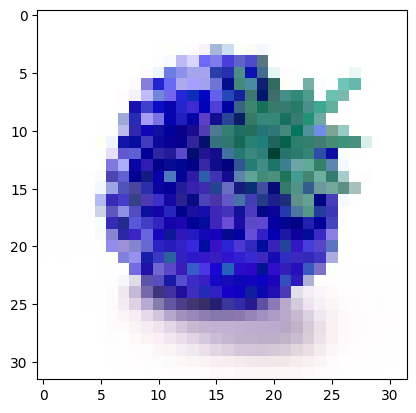

In [ ]:
plt.imshow(trainX[0])